<a href="https://colab.research.google.com/github/JonasSouza871/Estudo_machine_learning/blob/main/1.Classica%C3%A7%C3%A3o_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O primeiro projeto

---------------------

- Dataset:

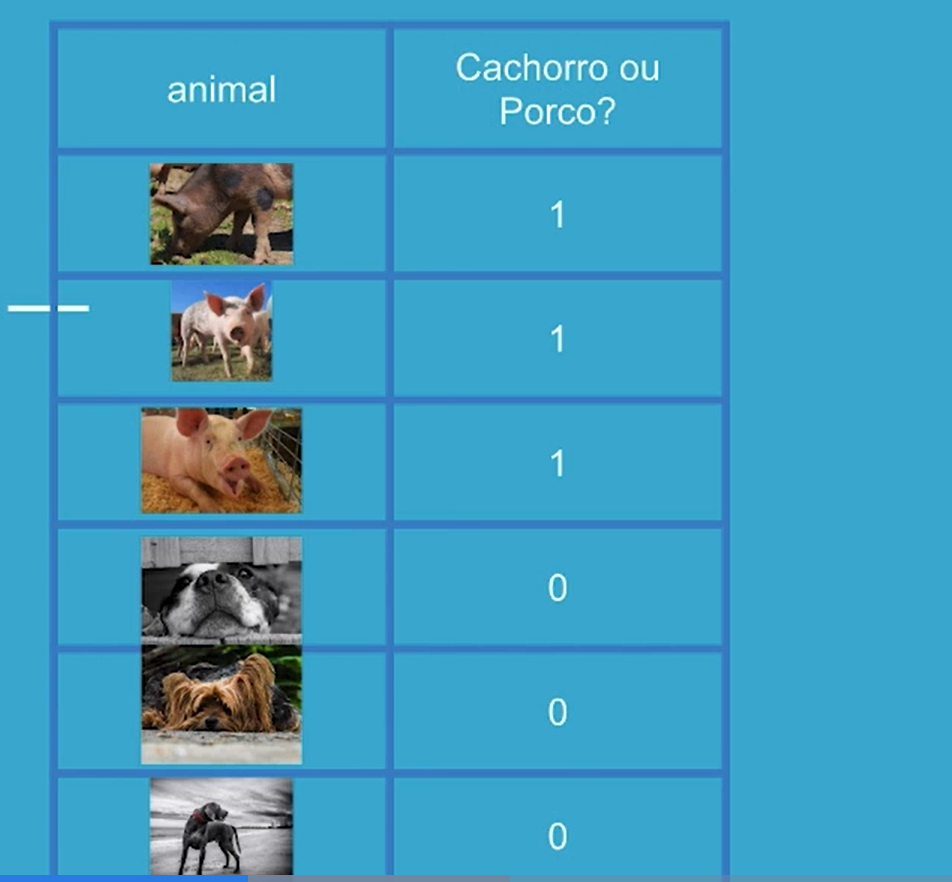

- Aprendizado supervisionado: Você ensina apartir de características dos animais, quanto mais informação melhor será o resultado.

- Features:

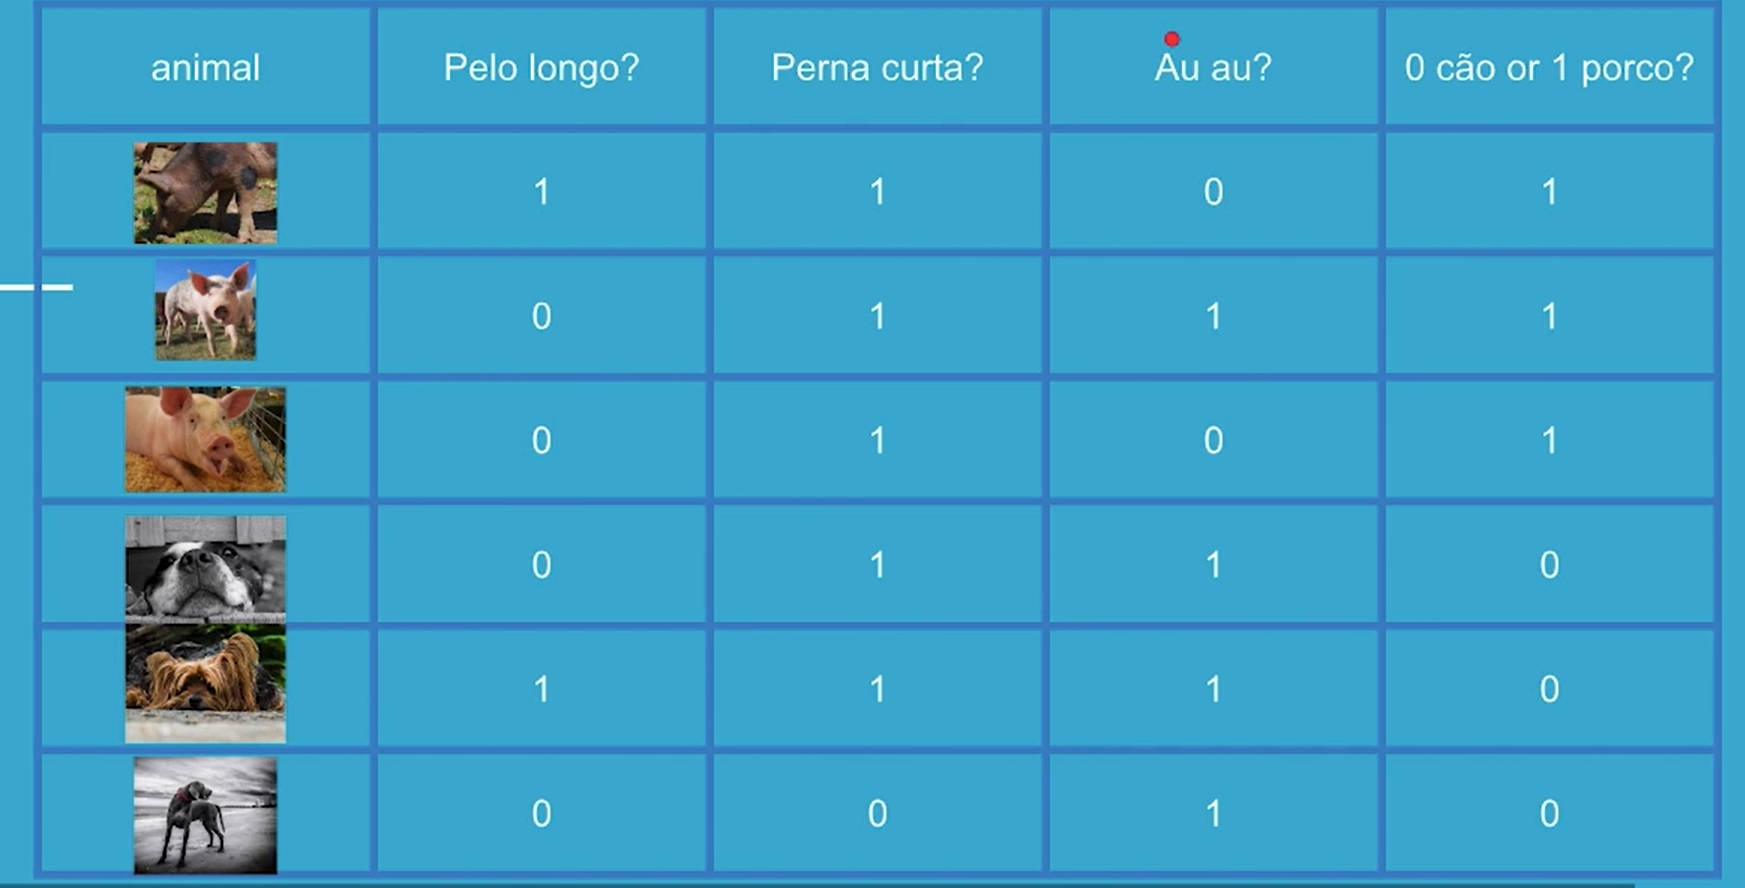

-  As 3 primeiras colunas são features (Características dos animais e a ultima é a de classificação) -> validação

In [1]:
#longo?
#perna curta?
# faz au au?

porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

dados = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
classes = [1,1,1,0,0,0] #classes a quais os dados pertencem
# 1 para porco e 0 para cachorro
# classes verdadeirasa

## Biblioteca scikit-learn

varios algoritmos de estimação

In [2]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(dados,classes) #Adaptar o modelo a uma informação
#como é um modelo supervisionado, além dos dados é necessário enviar as classes de cada animal também
#modelo foi treinado com as informaçoes.

LinearSVC()

In [3]:
animal_misterioso = [1,1,1] #Colocando as informaçoes de um animal que tem pelo longo, perna curta e faz au au.
model.predict([animal_misterioso]) #comando para o modelo prever qual animal é apartir do que ele foi treinado.
# o modelo chegou a conclusão que é um cachorro, está certo.


array([0])

-  Exemplo para varios animais misteriosos:

In [4]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste = [misterio1, misterio2, misterio3] #todos os animais misteriosos adicionados aq
model.predict(teste) #previu um cachorro, segundo porco, terceiro cachorro.

array([0, 1, 0])

- O que era na verdade:

In [5]:
[0,1,1] #Cachorro, porco,porco era o certo
#modelo teve 66,6% de acuracia.
previsto = model.predict(teste)
teste_real = [0,1,1]

In [6]:
previsto  == teste_real #Mesmo resultado qeu chegamos acima.

array([ True,  True, False])

In [7]:
valores_corretos = (previsto == teste_real).sum() #como 1 será de analises verdadeiras e 0 de falso, é so somar para encontrarmos a quantidade de verdadeiros
total = len(teste_real) #quantidade de termos no teste será o total
print(valores_corretos,total)
taxa_acerto = (valores_corretos/total)*100
print(taxa_acerto)

2 3
66.66666666666666


Parametros do acurracy score:

sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)


In [8]:
from sklearn.metrics import accuracy_score #Fazendo o calculo acima importanto a biblioteca
accuracy_score(teste_real, previsto, normalize = True, sample_weight =None) #real, previsto, e com a normalização ativa (valores entre 0 e1)

0.6666666666666666

- Mudando nomes das variaveis para padronizar o projeto.

In [9]:
treino_x = dados #os dados de treino
treino_y = classes #A classes de validação
teste_x = teste #Dados de teste
teste_y = teste_real #Validação dos dados de teste

# Testes Replicáveis, estraficação e lendo dados da Internet


--------------

In [10]:
import pandas as pd

In [11]:
Link_dados = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'
pd.read_csv(Link_dados) #Leitura dos dados do link que iremos trabalhar, dados disponíveis no github.

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
94,0,0,1,0
95,1,1,1,1
96,0,0,1,0
97,0,1,0,0


In [12]:
dados_gerais = pd.read_csv(Link_dados)

## O que temos nos dados:


- Temos 3 colunas com paginas diferentes dentro de um site: pagina home, how_it_works e contact.
- Tem também a ultima coluna que é para saber se o usuário comprou ou não o produto.
- 1 para se o usuário clicou e 0 se o usuário não clicou.

## Objetivo do projeto:
- o objetivo desse projeto vai ter que treinar o modelo com base nas features de cliques do usuário para prever se o usario é um potencial comprador ou não.
- O treino sera o dado de clique e a validação o de compra.

In [13]:
x = dados_gerais[["home", "how_it_works","contact"]] #Salva somente as colunas de treino (Clique).
print(x)

    home  how_it_works  contact
0      1             1        0
1      1             1        0
2      1             1        0
3      1             1        0
4      1             1        0
..   ...           ...      ...
94     0             0        1
95     1             1        1
96     0             0        1
97     0             1        0
98     0             0        0

[99 rows x 3 columns]


In [14]:
y = dados_gerais[["bought"]]
print(y)

    bought
0        0
1        0
2        0
3        0
4        0
..     ...
94       0
95       1
96       0
97       0
98       0

[99 rows x 1 columns]


## Treino

 - Sempre que a gente tem um conjunto de dados a gente tem que separar o conjunto de treino e testes para o modelo não se enviezar.
 - Uma boa técnica é treinar com 75% dos dados e testar com os 25% não utilizados.

In [15]:
dados_gerais.shape #quantidade de dados que temos, como podemos ver temos 99 dados (0 a 99)
# iremos utilizar 75 para treino (0 a 74)
# 25 para teste (74 a 99)

(99, 4)

In [16]:
treino_x = x[:75] #Os dados de treino serão os 75 primeiros dados
treino_y = y[:75] #Os 75 primeiros dados da coluna bought (validação)
treino_x.shape

(75, 3)

In [17]:
teste_x = x[75:] #Os 24 ultimos dados como sendo de teste
teste_y = y[75:] # Os ultimo 24 dados da coluna bought como sendo a verficação do teste
teste_x.shape

(24, 3)

In [18]:
model.fit(treino_x,treino_y) #Com base nos 75 dados de treino falado acima.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

In [19]:
import numpy as np

In [20]:
previsoes_modelo = model.predict(teste_x) #Previsao nos dados de teste
print(previsoes_modelo.shape) #Previsoes feitas apartir do treinamento nos dados de teste
print(previsoes_modelo)

(24,)
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0]


In [21]:
teste_y.shape

(24, 1)

- Problema:  Vemo que temos um problema ao utilizar os dados de previsoes_modelo e teste_y por conta de serem de modelo de array diferentes.
- para resolver isso iremos utilizar o parametros values.ravel() que converte um array multimensional em um Array 1D conforme o previsoes_modelo é

In [22]:
teste_y = teste_y.values.ravel() #conversao de array multimensional para 1D
print(teste_y)

[0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0]


In [23]:
Acertos_modelo = (previsoes_modelo == teste_y).sum()
print(Acertos_modelo) #O modelo acertou em 23 casos do teste (24 no total)
Total = len(teste_y)
print(Total)

23
24


In [24]:
Acurracia_modelo = Acertos_modelo/Total
print(Acurracia_modelo*100) #Acerto do modelo foi de 95,83% de acerto.

95.83333333333334


- Utilizando a biblioteca:

In [25]:
Acurracia_biblioteca = accuracy_score(teste_y, previsoes_modelo,normalize= True, sample_weight= None) #Primeiro o que é verdadeiro e depois o que é previsto
print(Acurracia_biblioteca*100)

95.83333333333334


-  Vemos que os valores bateram.

# Usando a biblioteca para separar treino e teste

----------------

In [26]:
from sklearn.model_selection import train_test_split

train_test_split(x,y) # O proprio modelo ja separar aleatoriamente entre teste e treino com uma separação de 75% para treino e 25% para teste
#veja que sao geradas 4 tabelas, treino_x, teste_x, treino_y, teste_y.

[    home  how_it_works  contact
 74     0             0        1
 26     1             1        1
 21     0             1        0
 71     0             0        1
 14     0             0        1
 ..   ...           ...      ...
 47     1             0        1
 84     1             0        1
 13     0             0        1
 87     0             0        1
 76     0             0        1
 
 [74 rows x 3 columns],
     home  how_it_works  contact
 23     0             1        0
 59     0             0        1
 8      1             1        0
 38     1             1        0
 20     0             0        1
 42     0             1        0
 67     1             0        1
 92     1             1        0
 82     0             0        1
 55     1             1        0
 39     1             0        1
 64     1             0        1
 50     1             1        0
 5      1             0        1
 22     0             0        1
 25     1             1        1
 35     1        

In [27]:
# para salvar nas variaveis:
treino_x,teste_x,treino_y, teste_y = train_test_split(x,y)
print(teste_x)
model.fit(treino_x,treino_y) #realiza o treinamento
previsao = model.predict(teste_x)
acuracia = accuracy_score(teste_y,previsao)
print(acuracia*100)

    home  how_it_works  contact
44     0             0        1
95     1             1        1
92     1             1        0
79     1             1        0
15     0             0        1
32     0             0        1
30     0             1        0
84     1             0        1
60     1             0        1
86     1             1        0
66     0             0        1
61     0             1        0
45     0             0        1
81     0             0        1
94     0             0        1
43     1             0        1
63     0             1        0
54     1             0        1
6      1             1        0
93     0             0        1
18     0             0        1
9      1             0        1
65     0             1        1
55     1             1        0
52     1             0        1
92.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 - Note que temos um problema aqui: O modelo fica variando sua acuracia toda hora a cada atualização, isso acontece que a função 'train_test_split(x,y)' está eparando aleatoriamente os dados de treino e teste, e a cada vez que a gente roda o codigo dnv ele gera uma separação com os dados em locais diferente, isso faz com que nunca seja a mesma ordem.

 - Para resolver isso utilizaremos uma random_state para que tenha uma reprodutibilidade do exeperimmento, para isso utilizaremos, uma SEED que vai garantir uma mesma aleatorização sempre.

In [28]:
SEED = 42
treino_x,teste_x,treino_y, teste_y = train_test_split(x,y, random_state=SEED) #atraves do parametro random_state
print(teste_x)
model.fit(treino_x,treino_y) #realiza o treinamento
previsao = model.predict(teste_x)
acuracia = accuracy_score(teste_y,previsao)
print(acuracia*100)

    home  how_it_works  contact
62     0             0        1
40     0             1        0
95     1             1        1
18     0             0        1
97     0             1        0
84     1             0        1
64     1             0        1
42     0             1        0
10     1             1        0
0      1             1        0
31     1             0        1
76     0             0        1
47     1             0        1
26     1             1        1
44     0             0        1
4      1             1        0
22     0             0        1
12     0             0        1
88     0             0        1
73     0             0        1
49     1             1        0
70     1             1        0
68     1             0        1
15     0             0        1
39     1             0        1
96.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Outro problema é a questao de garantir que na aleatoriedade se mantenha uma proporção entre o numero de elementos.
- Para resolver isso usa-se o paramentro stratify com o valor de qual variavel terá que ser proporcional.

In [29]:
SEED = 42
treino_x,teste_x,treino_y, teste_y = train_test_split(x,y, random_state=SEED,stratify= y) #atraves do parametro random_state e mantendendo a proporção através do stratify
print(teste_x)
model.fit(treino_x,treino_y) #realiza o treinamento
previsao = model.predict(teste_x)
acuracia = accuracy_score(teste_y,previsao)
print(acuracia*100)

    home  how_it_works  contact
78     0             0        1
10     1             1        0
12     0             0        1
87     0             0        1
80     0             0        1
62     0             0        1
69     1             1        0
24     1             0        1
37     0             0        1
19     0             1        0
26     1             1        1
32     0             0        1
36     1             0        1
47     1             0        1
55     1             1        0
23     0             1        0
92     1             1        0
7      1             0        1
81     0             0        1
15     0             0        1
61     0             1        0
89     1             0        1
46     1             0        1
29     0             0        1
85     1             1        0
96.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Se quisermos alterar a proporção de teste para treino, por exemplo fazer com que se tenha 80% dos dados de treino e 20% em teste podemos usar o paramentro test_size=0.2.

In [30]:
treino_x,teste_x,treino_y, teste_y = train_test_split(x,y,test_size=0.2,random_state=SEED,stratify= y) #atraves do parametro random_state e mantendendo a proporção através do stratify

# Projeto de baixa dimensionalidade e o baseline

- Novo dataset

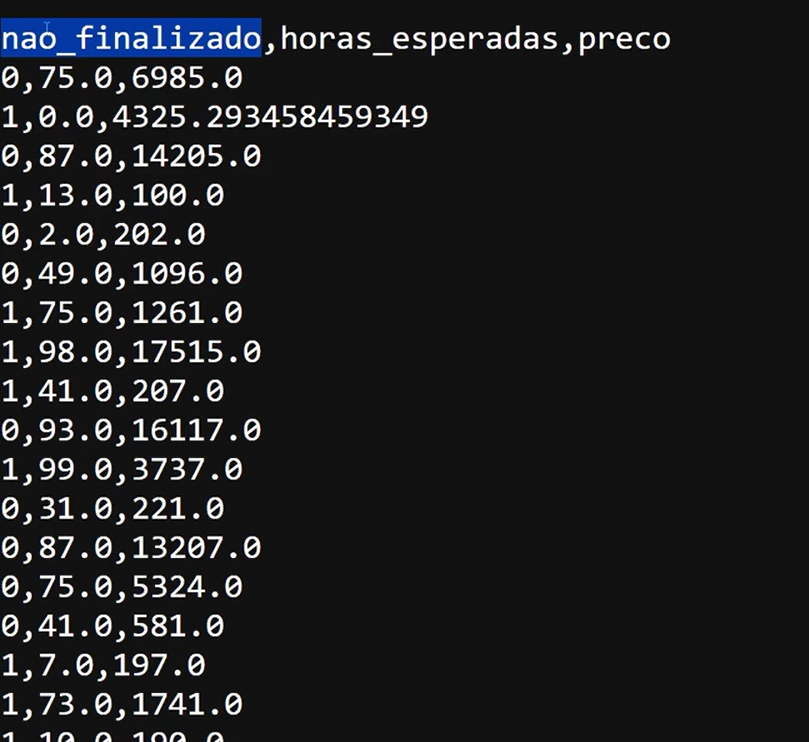

- Projeto com a primeira coluna com valores de 1 e 0 para definir se o projeto foi ou não finalizado.
- A segunda coluna tem a quantidade de horas esperadas para o projeto.
- A terceira coluna tem o preço esperado para o projeto.

In [31]:
Url_projeto = 'https://gist.github.com/guilhermesilveira/12291c548acaf544596795709020e3db'

In [ ]:
import pandas